In [1]:
import xpress as xp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time

In [2]:
xp.controls.outputlog = -1

Using the license file found in your Xpress installation. If you want to use this license and no longer want to see this message, use the following code before using the xpress module:
  xpress.init('D:/AppliRTE/xpressmp/bin/xpauth.xpr')


In [3]:
study_path = "D:/Users/gerbauxjul/Documents/6-Etudes Antares/OneNodeBase_v90_overflow"
output_path = study_path+"/output/20240412-1028eco-export"

In [4]:
def retrieve_problem(year,week,output_path,itr=1):
    model = xp.problem()
    model.read(output_path+f"/problem-{year}-{week}--optim-nb-{itr}.mps")
    return(model)

In [5]:
s = 0
k = 0

In [6]:
m = retrieve_problem(k+1,s+1,output_path,itr=1)

In [7]:
vars = m.getVariable()

In [8]:
df_vars = pd.DataFrame(vars, columns=["names"])
df_vars["split"] = df_vars["names"].apply(lambda x:x.name.strip().split("::"))
df_vars["name_var"] = df_vars["split"].apply(lambda x:x[0])
df_vars["antares_object"] = df_vars["split"].apply(lambda x:x[1].split("<")[0])
df_vars["name_antares_object"] = df_vars["split"].apply(lambda x:x[1].split("<")[1].split(">")[0])
df_vars["subobject"] = df_vars["split"].apply(lambda x:x[2] if len(x)>=4 else "None")
df_vars["time"] = df_vars["split"].apply(lambda x:int(x[-1].split("<")[1].split(">")[0]))
coltype = []
m.getcoltype(coltype, 0, m.attributes.cols - 1)
df_vars['coltype'] = coltype
bounds = []
m.getlb(bounds, 0, m.attributes.cols - 1)
df_vars['lb'] = bounds
bounds = []
m.getub(bounds, 0, m.attributes.cols - 1)
df_vars['ub'] = bounds
objcoef = []
m.getobj(objcoef,0,m.attributes.cols-1)
df_vars= df_vars.assign(coeff=[objcoef[i] for i in range(m.attributes.cols)])
# df_vars = df_vars.assign(sol=[m.getSolution(i) for i in range(m.attributes.cols)])
# df_vars = df_vars.assign(obj = lambda x: np.round(df_vars['sol'])*np.round(df_vars['coeff']))

In [9]:
df_vars

,names,split,name_var,antares_object,name_antares_object,subobject,time,coltype,lb,ub,coeff
0,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<Th1>,0,C,0.0,4.250000e+04,0.099456
1,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<Th2>,0,C,0.0,1.250000e+04,0.199493
2,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<Th3>,0,C,0.0,7.500000e+03,0.300570
3,PositiveUnsuppliedEnergy::area<area>::hour<0> ...,"[PositiveUnsuppliedEnergy, area<area>, hour<0>]",PositiveUnsuppliedEnergy,area,area,None,0,C,0.0,3.704000e+04,2.999412
4,NegativeUnsuppliedEnergy::area<area>::hour<0> ...,"[NegativeUnsuppliedEnergy, area<area>, hour<0>]",NegativeUnsuppliedEnergy,area,area,None,0,C,0.0,1.000000e+20,-0.000588
...,...,...,...,...,...,...,...,...,...,...,...
1507,NegativeUnsuppliedEnergy::area<area>::hour<167...,"[NegativeUnsuppliedEnergy, area<area>, hour<167>]",NegativeUnsuppliedEnergy,area,area,None,167,C,0.0,1.000000e+20,-0.000588
1508,HydProd::area<area>::hour<167> ...,"[HydProd, area<area>, hour<167>]",HydProd,area,area,None,167,C,0.0,5.000000e+04,-0.000879
1509,Pumping::area<area>::hour<167> ...,"[Pumping, area<area>, hour<167>]",Pumping,area,area,None,167,C,0.0,5.000000e+04,0.001757
1510,HydroLevel::area<area>::hour<167> ...,"[HydroLevel, area<area>, hour<167>]",HydroLevel,area,area,None,167,C,0.0,1.000000e+07,0.000000


In [10]:
np.unique(df_vars["name_antares_object"])

array(['area'], dtype=object)

In [11]:
cons = m.getConstraint()

In [12]:
len(cons)

508

In [13]:
df_cons = pd.DataFrame(cons, columns=["names"])
df_cons["split"] = df_cons["names"].apply(lambda x:x.name.strip().split("::"))
df_cons["name_cons"] = df_cons["split"].apply(lambda x:x[0])
df_cons["antares_object"] = df_cons["split"].apply(lambda x:x[1].split("<")[0])
df_cons["name_antares_object"] = df_cons["split"].apply(lambda x:x[1].split("<")[1].split(">")[0] if len(x[1].split("<"))>=2 else "None")
df_cons["time"] = df_cons["split"].apply(lambda x:int(x[-1].split("<")[1].split(">")[0]))
rhs = []
m.getrhs(rhs, 0, m.attributes.rows - 1)
df_cons["rhs"] = rhs

In [14]:
df_cons

,names,split,name_cons,antares_object,name_antares_object,time,rhs
0,AreaBalance::area<area>::hour<0> ...,"[AreaBalance, area<area>, hour<0>]",AreaBalance,area,area,0,-37040.000000
1,FictiveLoads::area<area>::hour<0> ...,"[FictiveLoads, area<area>, hour<0>]",FictiveLoads,area,area,0,0.000000
2,AreaBalance::area<area>::hour<1> ...,"[AreaBalance, area<area>, hour<1>]",AreaBalance,area,area,1,-42837.000000
3,FictiveLoads::area<area>::hour<1> ...,"[FictiveLoads, area<area>, hour<1>]",FictiveLoads,area,area,1,0.000000
4,AreaBalance::area<area>::hour<2> ...,"[AreaBalance, area<area>, hour<2>]",AreaBalance,area,area,2,-49172.000000
...,...,...,...,...,...,...,...
503,AreaHydroLevel::area<area>::hour<163> ...,"[AreaHydroLevel, area<area>, hour<163>]",AreaHydroLevel,area,area,163,190.541667
504,AreaHydroLevel::area<area>::hour<164> ...,"[AreaHydroLevel, area<area>, hour<164>]",AreaHydroLevel,area,area,164,190.541667
505,AreaHydroLevel::area<area>::hour<165> ...,"[AreaHydroLevel, area<area>, hour<165>]",AreaHydroLevel,area,area,165,190.541667
506,AreaHydroLevel::area<area>::hour<166> ...,"[AreaHydroLevel, area<area>, hour<166>]",AreaHydroLevel,area,area,166,190.541667


In [15]:
np.unique(df_cons["name_cons"])

array(['AreaBalance', 'AreaHydroLevel', 'FictiveLoads', 'HydroPower',
       'MaxHydroPower', 'MaxPumping', 'MinHydroPower'], dtype=object)

In [16]:
df_cons[df_cons["time"]==0]

,names,split,name_cons,antares_object,name_antares_object,time,rhs
0,AreaBalance::area<area>::hour<0> ...,"[AreaBalance, area<area>, hour<0>]",AreaBalance,area,area,0,-3.704000e+04
1,FictiveLoads::area<area>::hour<0> ...,"[FictiveLoads, area<area>, hour<0>]",FictiveLoads,area,area,0,0.000000e+00
336,HydroPower::area<area>::week<0> ...,"[HydroPower, area<area>, week<0>]",HydroPower,area,area,0,4.450000e+06
337,MinHydroPower::area<area>::week<0> ...,"[MinHydroPower, area<area>, week<0>]",MinHydroPower,area,area,0,0.000000e+00
338,MaxHydroPower::area<area>::week<0> ...,"[MaxHydroPower, area<area>, week<0>]",MaxHydroPower,area,area,0,8.400000e+06
339,MaxPumping::area<area>::week<0> ...,"[MaxPumping, area<area>, week<0>]",MaxPumping,area,area,0,8.400000e+06
340,AreaHydroLevel::area<area>::hour<0> ...,"[AreaHydroLevel, area<area>, hour<0>]",AreaHydroLevel,area,area,0,4.866667e+06


In [17]:
start = []
colind = []
colcoef = []

In [22]:
m.getrows(start=start,colind=colind,colcoef=colcoef,maxcoefs=600,first=340,last=340)

In [23]:
start

[0, 4]

In [24]:
colind

[HydProd::area<area>::hour<0>                                            ,
 Pumping::area<area>::hour<0>                                            ,
 HydroLevel::area<area>::hour<0>                                         ,
 Overflow::area<area>::hour<0>                                           ]

In [25]:
colcoef

[1.0, -1.0, 1.0, 1.0]

In [29]:
m.solve()

(<SolveStatus.COMPLETED: 3>, <SolStatus.OPTIMAL: 1>)

In [30]:
m.getProbStatusString()

'lp_optimal'

In [28]:
m.chgrhs([336], [5184044.456955])

In [31]:
df_vars = df_vars.assign(sol=[m.getSolution(i) for i in range(m.attributes.cols)])
df_vars = df_vars.assign(obj = lambda x: np.round(df_vars['sol'])*np.round(df_vars['coeff']))

In [37]:
df_vars

,names,split,name_var,antares_object,name_antares_object,subobject,time,coltype,lb,ub,coeff,sol,obj
0,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<Th1>,0,C,0.0,4.250000e+04,0.099456,0.000000e+00,0.0
1,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<Th2>,0,C,0.0,1.250000e+04,0.199493,0.000000e+00,0.0
2,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<Th3>,0,C,0.0,7.500000e+03,0.300570,0.000000e+00,0.0
3,PositiveUnsuppliedEnergy::area<area>::hour<0> ...,"[PositiveUnsuppliedEnergy, area<area>, hour<0>]",PositiveUnsuppliedEnergy,area,area,None,0,C,0.0,3.704000e+04,2.999412,0.000000e+00,0.0
4,NegativeUnsuppliedEnergy::area<area>::hour<0> ...,"[NegativeUnsuppliedEnergy, area<area>, hour<0>]",NegativeUnsuppliedEnergy,area,area,None,0,C,0.0,1.000000e+20,-0.000588,1.296000e+04,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,NegativeUnsuppliedEnergy::area<area>::hour<167...,"[NegativeUnsuppliedEnergy, area<area>, hour<167>]",NegativeUnsuppliedEnergy,area,area,None,167,C,0.0,1.000000e+20,-0.000588,0.000000e+00,-0.0
1508,HydProd::area<area>::hour<167> ...,"[HydProd, area<area>, hour<167>]",HydProd,area,area,None,167,C,0.0,5.000000e+04,-0.000879,1.102600e+04,-0.0
1509,Pumping::area<area>::hour<167> ...,"[Pumping, area<area>, hour<167>]",Pumping,area,area,None,167,C,0.0,5.000000e+04,0.001757,0.000000e+00,0.0
1510,HydroLevel::area<area>::hour<167> ...,"[HydroLevel, area<area>, hour<167>]",HydroLevel,area,area,None,167,C,0.0,1.000000e+07,0.000000,9.293394e+06,0.0


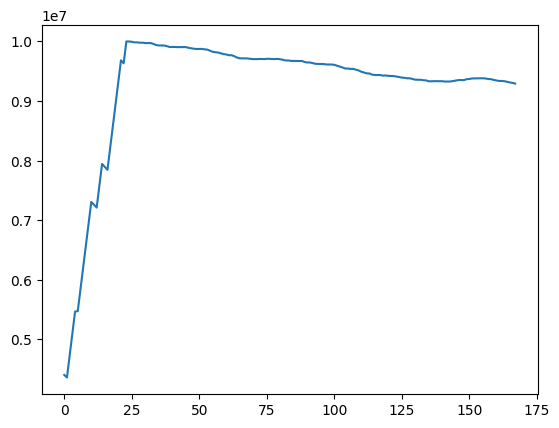

In [42]:
plt.figure()
plt.plot(df_vars[df_vars["name_var"]=="HydroLevel"]["sol"].values)
# plt.plot(df_vars[df_vars["name_var"]=="Overflow"]["sol"].values)
# plt.plot(df_vars[df_vars["name_var"]=="HydProd"]["sol"].values)
# plt.plot(df_vars[df_vars["name_var"]=="Pumping"]["sol"].values)

In [43]:
df_vars[df_vars["name_var"]=="HydroLevel"]["sol"].values

array([ 4400000.        ,  4357163.        ,  4723829.66666667,
        5093017.33333333,  5463889.        ,  5471400.33333333,
        5838066.99999999,  6204733.66666666,  6571400.33333333,
        6938704.99999999,  7305371.66666666,  7259708.66666666,
        7209708.66666666,  7576375.33333333,  7943041.99999999,
        7894510.99999999,  7844510.99999999,  8211177.66666666,
        8577844.33333333,  8944511.        ,  9311177.66666666,
        9683333.33333333,  9633333.33333333, 10000000.        ,
       10000000.        ,  9994932.54166667,  9985018.08333334,
        9985208.625     ,  9979527.16666667,  9979717.70833334,
        9972986.25000001,  9973176.79166668,  9973367.33333334,
        9959236.87500001,  9941333.41666668,  9933052.95833335,
        9933243.50000001,  9931474.04166668,  9922234.58333335,
        9907129.12500002,  9907319.66666669,  9907510.20833335,
        9905276.75000002,  9905467.29166669,  9905657.83333336,
        9906137.37500003,  9894159.91666